In [29]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# 파일 불러오기
## 19년 7월 데이터 불러오기 & concat
sb1907_1 = pd.read_csv('./data/seoul_bike_201907_1.csv',encoding='cp949')
sb1907_2 = pd.read_csv('./data/seoul_bike_201907_2.csv',encoding='cp949')
sb1907_3 = pd.read_csv('./data/seoul_bike_201907_3.csv',encoding='cp949')
sb1907 = pd.concat([sb1907_1,sb1907_2,sb1907_3])

## 19년 8월 데이터 불러오기 & concat
sb1908_1 = pd.read_csv('./data/seoul_bike_201908_1.csv',encoding='cp949')
sb1908_2 = pd.read_csv('./data/seoul_bike_201908_2.csv',encoding='cp949')
sb1908_3 = pd.read_csv('./data/seoul_bike_201908_3.csv',encoding='cp949')
sb1908 = pd.concat([sb1908_1,sb1908_2,sb1908_3])

In [12]:
sb1907.to_csv("./data/sb1907.csv",mode="w")
sb1908.to_csv("./data/sb1908.csv",mode="w")

- 19년 7월 total :   2,082,611건 
- 19년 8월 total :   2,028,698건
- 20년 7,8월 total : 2,254,077건
    - 19년 보다 20년도에 이용량이 절반 수준으로 감소했음.

In [4]:
sb2078 = pd.read_csv('./data/seoul_bike_2020.07_08.csv',encoding='cp949')

In [9]:
#20 7&8월 데이터 쪼개기
sb2078 = sb2078.sort_values(by=['rental_day','rental_time'])
sb2078.reset_index(drop=True,inplace=True)

In [11]:
# 7,8월 나누기 및 csv 로 저장하기
sb2007 = sb2078[:85286]
sb2007.to_csv("sb2007.csv",mode="w")
sb2008 = sb2078[85286:]
sb2008.to_csv("sb2008.csv",mode="w")

In [8]:
# 전처리 함수 적용하기
sb1907 = using_change(sb1907)
sb1908 = using_change(sb1908)
sb2078 = using_change(sb2078)

/Users/riversong/opt/anaconda3/envs/dss/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/riversong/opt/anaconda3/envs/dss/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [217]:
sb2078

,rental_station_num,rental_station_name,return_station_num,return_station_name,using_time,using_distance,rental_day,rental_time,return_day,return_time,bicycle_type_num
0,113,홍대입구역 2번출구 앞,128,신촌역(2호선) 1번출구 옆,12,1440.00,2020-07-01,00:03:07,2020-07-01,00:16:32,1
1,130,신촌역(2호선) 7번출구 앞,133,해담는다리,41,8547.30,2020-07-01,18:33:53,2020-07-01,19:15:19,2
2,152,마포구민체육센터 앞,184,SK망원동주유소 건너편,7,671.60,2020-07-01,19:08:10,2020-07-01,19:15:12,2
3,156,서울서부지방법원 앞,2000,신도림4차 e편한세상 아파트 1109동 앞,59,8617.39,2020-07-01,18:16:06,2020-07-01,19:15:07,2
4,426,서울신용보증재단,2707,한강아파트,63,12859.16,2020-07-01,18:11:31,2020-07-01,19:14:51,2
...,...,...,...,...,...,...,...,...,...,...,...
143049,102,망원역 1번출구 앞,107,신한은행 서교동금융센터점 앞,9,0.00,2020-08-31,08:12:51,2020-08-31,08:22:03,2
143050,122,신성기사식당 앞,124,서강대 정문 건너편,3,0.00,2020-08-31,08:18:56,2020-08-31,08:22:14,2
143051,118,광흥창역 2번출구 앞,135,명물길 원형무대 앞,12,0.00,2020-08-31,08:10:28,2020-08-31,08:22:27,2
143052,145,공덕역 5번출구,426,서울신용보증재단,5,0.00,2020-08-31,08:18:11,2020-08-31,08:23:20,2


In [185]:
sb1907_2 = pd.read_csv('./data/seoul_bike_201907_2.csv',encoding='cp949')

In [154]:
sb20 = pd.read_csv('./data/seoul_bike_2020.07_08.csv',encoding='cp949')

In [9]:
# 대여소번호, 보관소(대여소)명, 소재지, longitude, latitude
# csv 파일의 컬럼을 사용할 컬럼만 선택하고 나머지는 drop
def station_change(df):
    df = df.drop(['Unnamed: 3','설치\n시기','설치형태','Unnamed: 8','운영\n방식'],axis=1)
    df.columns=['station_num','station_name','location','longitude','latitude']
    return df
    

In [7]:
# 자전거번호, 대여일시, 대여 대여소번호,대여 대여소명, 반납일시, 반납대여소번호, 반납대여소 이름, 이용시간, 이용거리
# csv 파일의 컬럼을 사용할 컬럼만 선택하고 나머지는 drop
def using_change(df):
    # 사용컬럼만 남기고 나머지 drop
    df = df.drop(['대여거치대','반납거치대'], axis=1)
    df.columns=['bicycle_type','rental_dt','rental_station_num ','rental_station_name','return_dt','return_station_num','return_station_name','using_time','using_distance']
    
    
    # 마포구 내의 station_number에 해당하는지 여부 검색
    mapo = [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 136, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 181, 182, 183, 184, 185, 186, 199, 400, 401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 427, 432, 436, 437, 438, 439, 440, 487, 489, 490, 491, 492, 493, 494, 495, 497, 498, 3002, 3003, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 4202]
    df = df[df['rental_station_num '].isin(mapo)]
    
    
    # rent_dt & return_dt 를 split으로 날짜와 시간을 분리
    rent_D = df['rental_dt'].str.split(' ').str[0]
    rent_T = df['rental_dt'].str.split(' ').str[1] 
    return_D = df['return_dt'].str.split(' ').str[0]
    return_T = df['return_dt'].str.split(' ').str[1]
    
    
    # bicycle의 타입을 알기 위해 split으로 분리 후 넘버만 저장
    bicycle_num = df['bicycle_type'].str.split('-').str[1]
    
    
    # 분리된 날짜와 시간 새로운 컬럼으로 삽입
    df['rental_day'] = rent_D
    df['rental_time'] = rent_T
    df['return_day'] = return_D
    df['return_time'] = return_T
    df['bicycle_type_num'] = bicycle_num
    
    
    # 나눠진 기존의 컬럼 drop
    df = df.drop('rental_dt',axis=1)
    df = df.drop('return_dt',axis=1)
    df = df.drop('bicycle_type',axis=1)
    
    
    # 따릉이 번호에 따른 타입 분류
    tmp = df['bicycle_type_num'].astype(int)
    df['bicycle_type_num'] = tmp
    basic_bicycle = df[df['bicycle_type_num'].isin(range(0,27001))]
    basic_bicycle['bicycle_type_num'] = 1
    qr_bicycle = df[df['bicycle_type_num'].isin(range(30000,80001))]
    qr_bicycle['bicycle_type_num'] = 2
    kid_bicycle = df[df['bicycle_type_num'].isin(range(80001,200000))]
    kid_bicycle['bicycle_type_num'] = 3
    df = pd.concat([basic_bicycle,qr_bicycle,kid_bicycle])
    
    # 빌린 날짜순 정렬
    df = df.sort_values(by='rental_day')
    
    # index reset
    df.reset_index(drop=True,inplace=True)
    
    return df

In [65]:
def filtering_mapo(df):
    mapo = [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 136, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 181, 182, 183, 184, 185, 186, 199, 400, 401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 427, 432, 436, 437, 438, 439, 440, 487, 489, 490, 491, 492, 493, 494, 495, 497, 498, 3002, 3003, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 4202]
    df = df[df['rental_station_num '].isin(mapo)]
    return df

In [11]:
def split_dt(df):
    # rent_dt & return_dt 를 split으로 날짜와 시간을 분리
    rent_D = df['rental_dt'].str.split(' ').str[0]
    rent_T = df['rental_dt'].str.split(' ').str[1] 
    return_D = df['return_dt'].str.split(' ').str[0]
    return_T = df['return_dt'].str.split(' ').str[1]
    # bicycle의 타입을 알기 위해 split으로 분리 후 넘버만 저장
    bicycle_num = df['bicycle_type'].str.split('-').str[1]
    
    
    df['rental_day'] = rent_D
    df['rental_time'] = rent_T
    df['return_day'] = return_D
    df['return_time'] = return_T
    df['bicycle_type_num'] = bicycle_num
    
    return df


In [10]:
def column_drop(df):
    df = df.drop('rental_dt',axis=1)
    df = df.drop('return_dt',axis=1)
    df = df.drop('bicycle_type',axis=1)
    return df

In [149]:
#
def type_to_num(df):
    tmp = df['bicycle_type_num'].astype(int)
    df['bicycle_type_num'] = tmp
    basic_bicycle = df[df['bicycle_type_num'].isin(range(0,27001))]
    basic_bicycle['bicycle_type_num'] = 1
    qr_bicycle = df[df['bicycle_type_num'].isin(range(30000,80001))]
    qr_bicycle['bicycle_type_num'] = 2
    kid_bicycle = df[df['bicycle_type_num'].isin(range(80001,200000))]
    kid_bicycle['bicycle_type_num'] = 3
    df = pd.concat([basic_bicycle,qr_bicycle,kid_bicycle])
    return df

In [64]:
# 마포구 스테이션 리스트
mapo = [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 118, 119, 120, 121, 122, 124, 125, 126, 127, 129, 130, 136, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 181, 182, 183, 184, 185, 186, 199, 400, 401, 402, 403, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 424, 425, 426, 427, 432, 436, 437, 438, 439, 440, 487, 489, 490, 491, 492, 493, 494, 495, 497, 498, 3002, 3003, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 4202]

   - 00001 ~ 10000 : 초기형 
   - 10001 ~ 20000 : 후기형
   - 20001 ~ 27000 : 개선형
   - 30001 ~       : QR단말기(뉴따릉이)형
   - 80001 ~       : 새싹따릉이 : 청소년, 어르신 등도 편리하게 이용할 수 있도록 만든 모델

In [ ]:
x_values = [0, 1, 2, 3, 4]	# x축 지점의 값들
y_values = [0, 1, 4, 9, 16]	# y축 지점의 값들
plt.plot(x_values, y_values)	# line 그래프를 그립니다
plt.show()

In [13]:
sb1907['rental_day']

0         2019-07-01
1         2019-07-01
2         2019-07-01
3         2019-07-01
4         2019-07-01
             ...    
144716    2019-07-31
144717    2019-07-31
144718    2019-07-31
144719    2019-07-31
144720    2019-07-31
Name: rental_day, Length: 144721, dtype: object

In [47]:
sb1907.groupby(sb1907['rental_day']).count()
sb1908.groupby(sb1908['rental_day']).count()
sb2007.groupby(sb2007['rental_day']).count()
sb2008.groupby(sb2008['rental_day']).count()

,rental_station_num,rental_station_name,return_station_num,return_station_name,using_time,using_distance,rental_time,return_day,return_time,bicycle_type_num
rental_day,,,,,,,,,,
2020-08-01,1040,1040,1040,1040,1040,1040,1040,1040,1040,1040
2020-08-02,298,298,298,298,298,298,298,298,298,298
2020-08-03,462,462,462,462,462,462,462,462,462,462
2020-08-04,1558,1558,1558,1558,1558,1558,1558,1558,1558,1558
2020-08-05,961,961,961,961,961,961,961,961,961,961
2020-08-06,1835,1835,1835,1835,1835,1835,1835,1835,1835,1835
2020-08-07,2675,2675,2675,2675,2675,2675,2675,2675,2675,2675
2020-08-08,1249,1249,1249,1249,1249,1249,1249,1249,1249,1249
2020-08-09,358,358,358,358,358,358,358,358,358,358


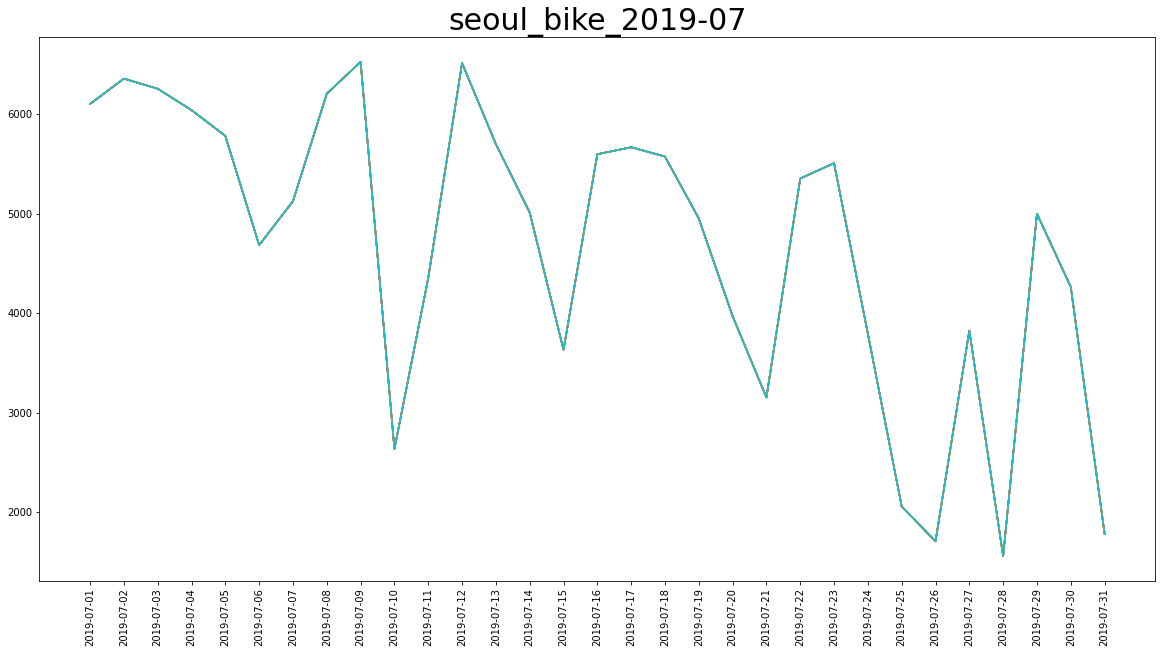

In [54]:
plt.figure(figsize=(20, 10))
plt.title('seoul_bike_2019-07',size=30)
plt.plot(sb1907.groupby(sb1907['rental_day']).count())
plt.xticks(rotation=90)
plt.show()

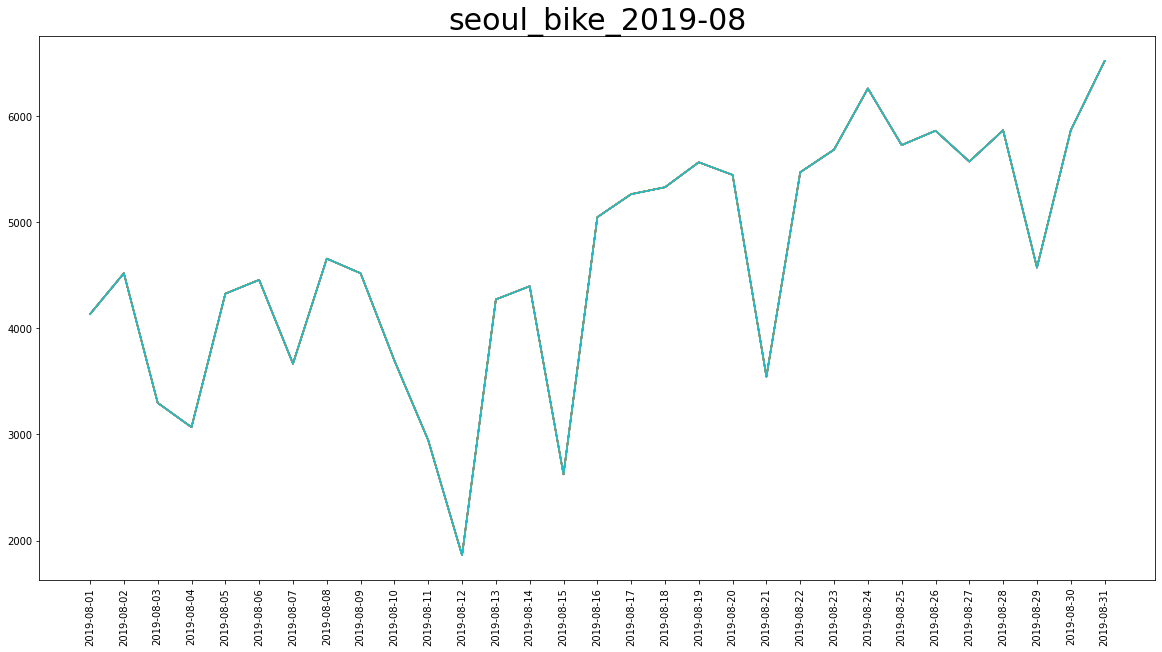

In [51]:
plt.figure(figsize=(20, 10))
plt.title('seoul_bike_2019-08',size=30)
plt.plot(sb1908.groupby(sb1908['rental_day']).count())
plt.xticks(rotation=90)
plt.show()

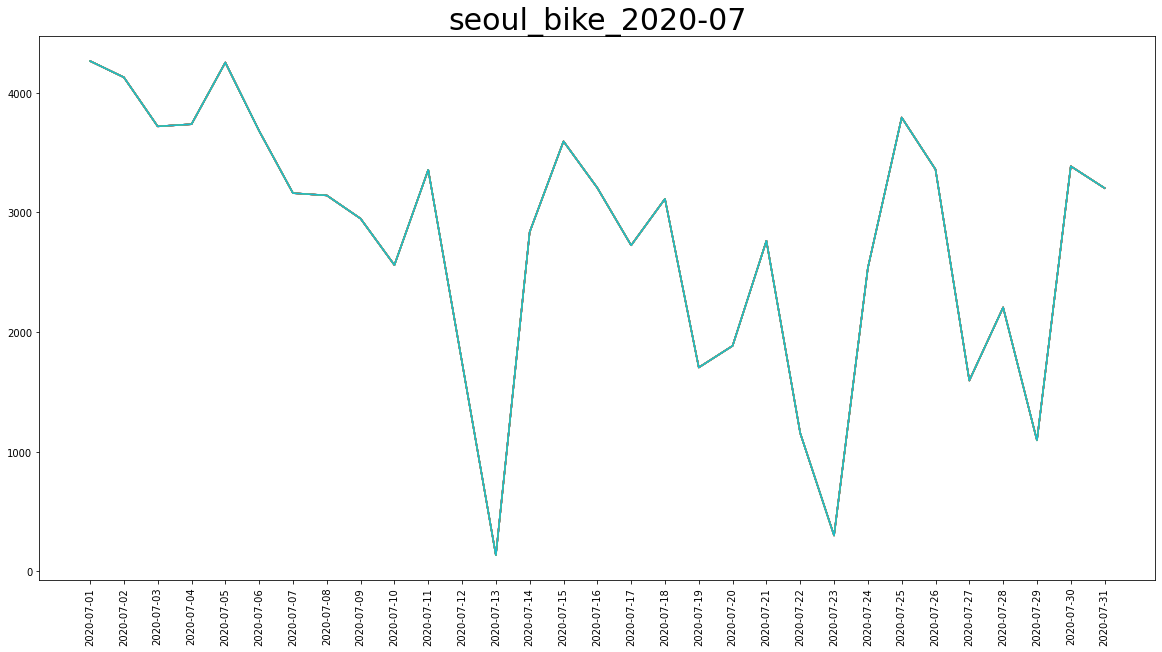

In [52]:
plt.figure(figsize=(20, 10))
plt.title('seoul_bike_2020-07',size=30)
plt.plot(sb2007.groupby(sb2007['rental_day']).count())
plt.xticks(rotation=90)
plt.show()

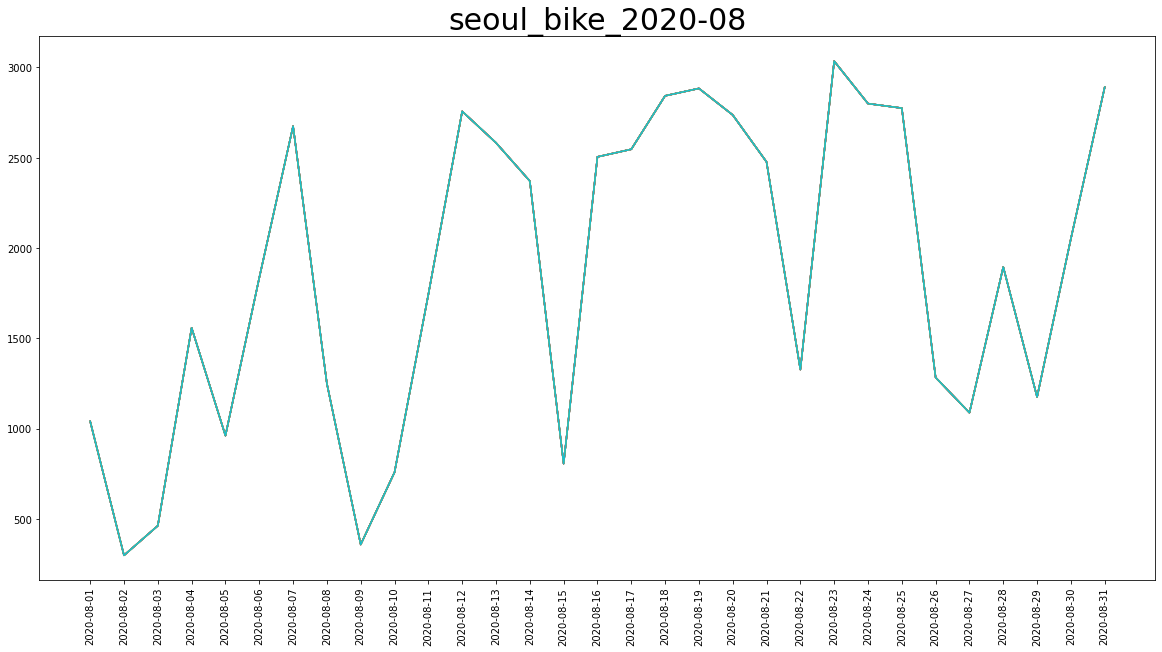

In [53]:
plt.figure(figsize=(20, 10))
plt.title('seoul_bike_2020-08',size=30)
plt.plot(sb2008.groupby(sb2008['rental_day']).count())
plt.xticks(rotation=90)
plt.show()

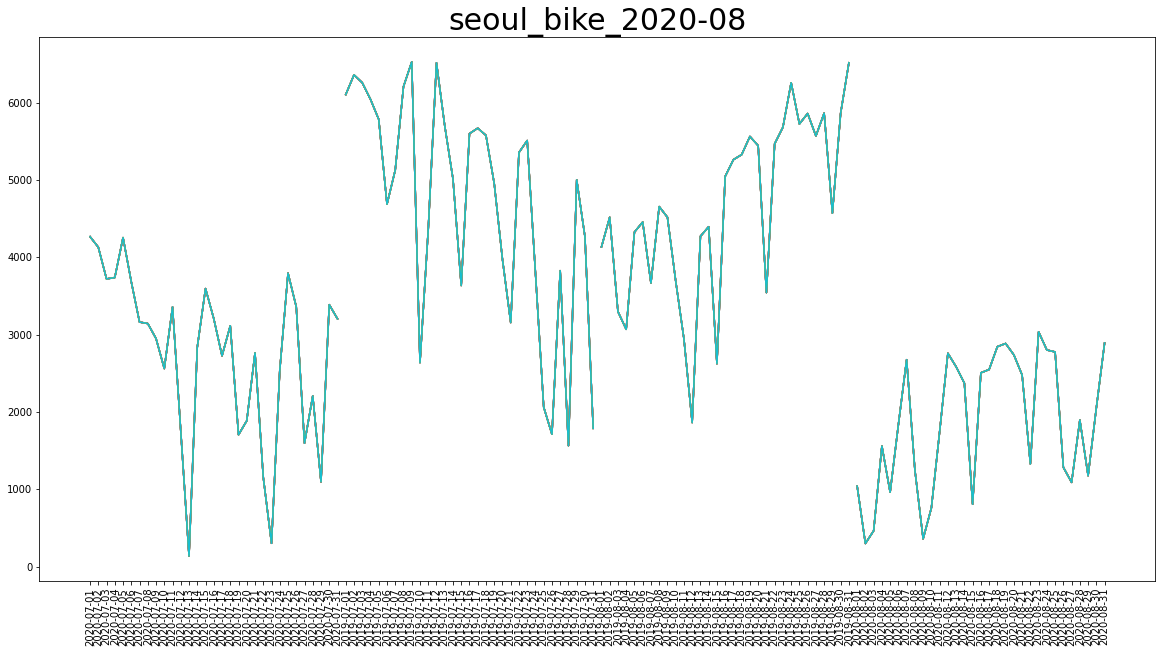

In [56]:
plt.figure(figsize=(20, 10))
plt.title('seoul_bike_2020-08',size=30)
plt.plot(sb2007.groupby(sb2007['rental_day']).count())
plt.plot(sb1907.groupby(sb1907['rental_day']).count())
plt.plot(sb1908.groupby(sb1908['rental_day']).count())
plt.plot(sb2008.groupby(sb2008['rental_day']).count())
plt.xticks(rotation=90)
plt.show()